# Chroma Key Project

This project is isolating the green background from a video and replace it with a background. It depends on transforming the image into the HSV space and then user thresholding for best possible results.

### Importing libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def remove_and_add(objects, bg, mask_lower, mask_higher):
    height, width, channels = objects.shape

    bg_cropped = cv2.resize(bg, (width, height))

    objects_hsv = cv2.cvtColor(objects, cv2.COLOR_RGB2HSV)

    objects_mask = cv2.inRange(objects_hsv, mask_lower, mask_higher)

    kernel = np.ones((3,3),np.uint8)

    objects_mask = cv2.erode(objects_mask,kernel,iterations = 1)
    objects_mask = cv2.blur(objects_mask,(15,15))
    
    condition = (objects_mask < 100)
    masked_objects = np.copy(objects)
    masked_objects[condition] = [0, 0, 0]

    bg_masked = np.copy(bg_cropped)
    bg_masked[~condition] = [0,0,0]

    full_picture = bg_masked + masked_objects

    return full_picture

# Threshold Setting:

First off, we select a random frame from the video, let's say the frame number 100. We will perform the thresholding on this frame.

Frame Shape:  (720, 1280, 3)


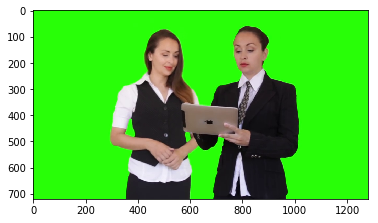

In [4]:
myFrameNumber = 100
cap = cv2.VideoCapture("video.mp4")

# get total number of frames
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

# check for valid frame number
if myFrameNumber >= 0 & myFrameNumber <= totalFrames:
    # set frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES,myFrameNumber)

ret, frame = cap.read()

frame_corrected = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

print("Frame Shape: ", frame_corrected.shape)
plt.imshow(frame_corrected)
plt.show()

Now let's perform thresholding by outputting trackbar for the user to select the best settings.

In [5]:
def nothing(x):
    pass

# Create a black image, a window
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('H1','image',0,255,nothing)
cv2.setTrackbarPos('H1', 'image', 0)

cv2.createTrackbar('H2','image',0,255,nothing)
cv2.setTrackbarPos('H2', 'image', 255)

cv2.createTrackbar('S1','image',0,255,nothing)
cv2.setTrackbarPos('S1', 'image', 0)

cv2.createTrackbar('S2','image',0,255,nothing)
cv2.setTrackbarPos('S2', 'image', 255)

cv2.createTrackbar('V1','image',0,255,nothing)
cv2.setTrackbarPos('V1', 'image', 0)

cv2.createTrackbar('V2','image',0,255,nothing)
cv2.setTrackbarPos('V2', 'image', 255)


while(1):
    k = cv2.waitKey(1) & 0xFF # escape to close
    if k == 27:
        break    

    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

    h = frame_hsv[:, :, 0]
    s = frame_hsv[:, :, 1]
    v = frame_hsv[:, :, 2]
    
    # get current positions of four trackbars
    h1 = cv2.getTrackbarPos('H1','image')
    h2 = cv2.getTrackbarPos('H2','image')

    s1 = cv2.getTrackbarPos('S1','image')
    s2 = cv2.getTrackbarPos('S2','image')

    v1 = cv2.getTrackbarPos('V1','image')
    v2 = cv2.getTrackbarPos('V2','image')


    mask_lower = np.array([h1, s1, v1])
    mask_higher = np.array([h2, s2, v2])
    
    frame_out = cv2.inRange(frame_hsv, mask_lower, mask_higher)

    bg_masked = np.copy(frame)
    bg_masked[frame_out == 0] = [0,0,0]

    cv2.imshow('image',bg_masked)

    
cv2.destroyAllWindows()

The threshold values are:

In [6]:
mask_lower

array([77,  0,  0])

In [7]:
mask_higher

array([255, 255, 255])

## Run the filter across all frames of the video:

In [9]:
import numpy as np
import cv2

## opening videocapture
cap = cv2.VideoCapture('video.mp4')

## some videowriter props
sz = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fps = 20
fourcc = cv2.VideoWriter_fourcc(*'mpeg') 

## open and set props
vout = cv2.VideoWriter()
vout.open('output.mp4',fourcc,fps,sz,True)

# background:
bg = cv2.imread('bg.jepg')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    mask_lower = np.array([h1, s1, v1])
    mask_higher = np.array([h2, s2, v2])

    frame = remove_and_add(frame, bg, mask_lower, mask_higher)
    vout.write(frame) 

    cv2.imshow('frame', frame)

    k = cv2.waitKey(1) & 0xFF # escape to close
    if k == 27:
        break

cap.release()
vout.release()

cv2.destroyAllWindows()

error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4044: error: (-215) ssize.width > 0 && ssize.height > 0 in function cv::resize
